**Author:** Loic Soares Bagnoud   
**Notebook Purpose:**  
1. Get  all hourly data for the previous five days for the five FAANG stocks from Yfinance
2. Plot said data
3. Store both the csv data and its plots it their appropriate folders
4. Repeat steps 1-3 every Saturday at 9:30 AM UTC

# Problems

## Problem 1: Data from yfinance

The first thing that is necessary is to import the packages we need. In this case, we'll start with the following:

In [1]:
# This imports the Os module
import os

# This imports datetime
from datetime import datetime

# This imports Pandas
import pandas as pd

# This imports Matplotlib
import matplotlib.pyplot as plt

# This imports yfinance
import yfinance as yf

Afterwards, since yfinance is an unnoficial package, let's test it out to make sure it's working. If we follow along with the main documentation, we can see that yf.download will get us the data we need. If everything is working, we should have no issues here.

In [2]:
# As per the documentation, we create first the variable called tickers and use yf.Tickers.
tickers = yf.Tickers('META AAPL AMZN NFLX GOOG')

# With that variable set up, we can go ahead and just print data for 1 month. 
current_data = yf.download(["META", "AAPL", "AMZN", "NFLX", "GOOG"], period='1mo')
print(current_data)

# References:
# https://ranaroussi.github.io/yfinance/

/tmp/ipykernel_2662/2821640980.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  current_data = yf.download(["META", "AAPL", "AMZN", "NFLX", "GOOG"], period='1mo')
[*********************100%***********************]  5 of 5 completed

Price            Close                                                  \
Ticker            AAPL        AMZN        GOOG        META        NFLX   
Date                                                                     
2025-11-17  267.459991  232.869995  285.413788  601.519409  110.290001   
2025-11-18  267.440002  222.550003  284.774200  597.202942  114.089996   
2025-11-19  268.559998  222.690002  292.798950  589.838928  110.000000   
2025-11-20  266.250000  217.139999  289.790955  588.669922  105.669998   
2025-11-21  271.489990  220.690002  299.454620  593.765747  104.309998   
2025-11-24  275.920013  226.279999  318.262360  612.550415  106.970001   
2025-11-25  276.970001  229.669998  323.428986  635.701477  104.400002   
2025-11-26  277.549988  229.160004  320.071167  633.093628  106.139999   
2025-11-28  278.850006  233.220001  319.911285  647.421997  107.580002   
2025-12-01  283.100006  233.880005  314.914520  640.347717  109.129997   
2025-12-02  286.190002  234.419998  31

With everything properly tested, the next step is writing the function itself to get the closing data on these same companies.

In [3]:
def get_data():
    
    # By following the documentation and the format that we defined above, we can do the same thing here. 
    # The only problem I had was the hourly interval.
    # Luckily, I was able to find some information on this and the only thing that's needed is setting up a variable called "interval" 
    # with the desired interval time.
    df = yf.download(
        ["META", "AAPL", "AMZN", "NFLX", "GOOG"],
        period="5d",
        interval="1h"
    )

    # We then use the datetime package to help us with the formatting. 
    # In this case, we can use strftime, which returns a string representing date and time using date, time or datetime object. 
    # In other words, we can use the datetime function and apply that format to make sure it has the format we want.
    time_format = datetime.now().strftime("%Y%m%d-%H%M%S")

    # We then create a variable called data that contains the full path and name of the file we need to save. This snippet came from ChatGpt(reference below).
    data = f"data/{time_format}.csv"

    # Finally, we send it to the folder with the to_csv function.
    df.to_csv(data)

    return df

# If it all works out, we can run this and it will create our csv file. 

yfinance_data = get_data()

yfinance_data


# References
# https://algotrading101.com/learn/yfinance-guide/ - On Yfinance in general
# https://www.programiz.com/python-programming/datetime/strftime - On using the datetime package
# https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html - On the Yfinance.download parameters
# https://www.geeksforgeeks.org/pandas/saving-a-pandas-dataframe-as-a-csv/ - On saving a pandas df as a csv
# ChatGpt - For the solution on data = f"data/{time_format}.csv":
'''
    ✅ Explanation
    - f"data/{timestamp}.csv" points directly to your folder.
    - df.to_csv(filepath) writes the file—no imports or folder checks needed since the folder exists.

    It’s short, clean, and will drop your file neatly into the data/ folder every time you run it.

    Me - "I dont understand this specifically: filename = f"data/{time_format}.csv" Is this needed? 
    Since I already have df.to_csv(filename), why do I need that?"

    You need:
    filename = f"data/{time_format}.csv" because df.to_csv() needs to know where to save the file.
    That line creates the file path as a string (e.g. "data/20251013-214200.csv") — which you then pass into df.to_csv().
'''

/tmp/ipykernel_2662/712770562.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(
[*********************100%***********************]  5 of 5 completed


'\n    ✅ Explanation\n    - f"data/{timestamp}.csv" points directly to your folder.\n    - df.to_csv(filepath) writes the file—no imports or folder checks needed since the folder exists.\n\n    It’s short, clean, and will drop your file neatly into the data/ folder every time you run it.\n\n    Me - "I dont understand this specifically: filename = f"data/{time_format}.csv" Is this needed? \n    Since I already have df.to_csv(filename), why do I need that?"\n\n    You need:\n    filename = f"data/{time_format}.csv" because df.to_csv() needs to know where to save the file.\n    That line creates the file path as a string (e.g. "data/20251013-214200.csv") — which you then pass into df.to_csv().\n'

In [5]:
# Small test to see what the close column is from one of the files in the folder
csv_path = "data/20251203-183632.csv"  
df = pd.read_csv(csv_path, header=[0, 1], skiprows=[2], index_col=0, parse_dates=True)  
df.head(5)

Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
2025-11-26 14:30:00+00:00  277.809998  230.514999  318.279999  635.400024   
2025-11-26 15:30:00+00:00  279.010101  231.084106  319.635010  637.190002   
2025-11-26 16:30:00+00:00  279.079010  230.880005  319.089996  636.739990   
2025-11-26 17:30:00+00:00  278.549988  230.710007  319.630005  635.599976   
2025-11-26 18:30:00+00:00  278.260010  229.565002  319.149994  633.900024   

Price                                        High                          \
Ticker                           NFLX        AAPL        AMZN        GOOG   
2025-11-26 14:30:00+00:00  106.089996  279.047485  230.809998  324.984985   
2025-11-26 15:30:00+00:00  106.300003  279.140015  231.309998  320.458313   
2025-11-26 16:30:00+00:00  106.610001  279.529999  231.747406  320.205994   
2025-11-26 17:30:00+00:00  106.455002  279.290009  230.990005  319.790009   
2025-11-26 18:30:00+00:00  106.210098  278.581787  230.744995  319.670013   

Price                                              ...        Open  \
Ticker                           META        NFLX  ...        AAPL   
2025-11-26 14:30:00+00:00  638.330017  106.800003  ...  276.959991   
2025-11-26 15:30:00+00:00  638.200012  106.669998  ...  277.790009   
2025-11-26 16:30:00+00:00  638.330017  106.949997  ...  279.029999   
2025-11-26 17:30:00+00:00  637.030029  106.650002  ...  279.070007   
2025-11-26 18:30:00+00:00  635.549988  106.525002  ...  278.559998   

Price                                                                      \
Ticker                           AMZN        GOOG        META        NFLX   
2025-11-26 14:30:00+00:00  230.740005  320.779999  637.690002  105.760002   
2025-11-26 15:30:00+00:00  230.514999  318.290009  635.400024  106.089996   
2025-11-26 16:30:00+00:00  231.099899  319.660004  637.299988  106.300003   
2025-11-26 17:30:00+00:00  230.883301  319.089996  636.739990  106.625000   
2025-11-26 18:30:00+00:00  230.724304  319.630005  635.549988  106.462196   

Price                       Volume                                      
Ticker                        AAPL     AMZN     GOOG     META     NFLX  
2025-11-26 14:30:00+00:00  5086107  5841042  7913875  3299699  5155578  
2025-11-26 15:30:00+00:00  2510611  2659243  2653850  1076706  2328286  
2025-11-26 16:30:00+00:00  2586354  2039562  1991156   907633  1699400  
2025-11-26 17:30:00+00:00  1871279  2174338  1462437   731722  1311396  
2025-11-26 18:30:00+00:00  1426945  2207386  1134959   657870  1083115  

[5 rows x 25 columns]

We also need to make sure that that data is properly sorted and organised, so that we can always get the latest one.

In [6]:
# We assing to a variable the os function that searches through the data folder
data_files = os.listdir('data/')

# We sort them to get the latest one.
data_files.sort(reverse=True)

# We get the latest file.
data_files

['20251216-164034.csv',
 '20251209-175411.csv',
 '20251209-175143.csv',
 '20251209-093622.csv',
 '20251208-155748.csv',
 '20251208-145325.csv',
 '20251208-142941.csv',
 '20251203-183702.csv',
 '20251203-183632.csv',
 '20251126-152750.csv',
 '20251126-152628.csv',
 '20251126-144029.csv',
 '20251126-135913.csv',
 '20251126-135649.csv',
 '20251117-194254.csv',
 '20251111-163125.csv']

In [7]:
# We also make sure that we assign the latest csv file to a proper dataframe.
df = pd.read_csv(f'data/{data_files[0]}', header=[0, 1], skiprows=[2], index_col=0, parse_dates=True)
df

Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
2025-12-10 14:30:00+00:00  277.450012  231.735001  318.739990  651.317505   
2025-12-10 15:30:00+00:00  278.257690  231.660004  318.600006  652.849182   
2025-12-10 16:30:00+00:00  278.526489  230.720001  317.075104  650.250000   
2025-12-10 17:30:00+00:00  278.119995  230.335007  316.700012  644.843811   
2025-12-10 18:30:00+00:00  278.220001  230.264999  318.609985  645.489990   
2025-12-10 19:30:00+00:00  278.980011  231.919998  320.510010  647.919983   
2025-12-10 20:30:00+00:00  278.720001  231.690002  320.850006  649.929993   
2025-12-11 14:30:00+00:00  276.119995  230.880005  317.059998  652.609985   
2025-12-11 15:30:00+00:00  275.825012  228.850006  315.549988  646.609985   
2025-12-11 16:30:00+00:00  277.904999  230.082504  316.059998  648.840027   
2025-12-11 17:30:00+00:00  277.522614  229.479996  313.390015  649.390015   
2025-12-11 18:30:00+00:00  277.760010  229.844193  313.605011  651.919983   
2025-12-11 19:30:00+00:00  278.095001  229.692505  313.350006  650.549988   
2025-12-11 20:30:00+00:00  278.059998  230.270004  313.709991  652.780029   
2025-12-12 14:30:00+00:00  277.869995  226.380005  309.589996  644.010010   
2025-12-12 15:30:00+00:00  277.739990  226.020004  308.000000  641.469971   
2025-12-12 16:30:00+00:00  277.855011  226.330002  309.570007  643.219971   
2025-12-12 17:30:00+00:00  279.049988  226.990005  311.649994  647.500122   
2025-12-12 18:30:00+00:00  277.950012  226.850006  310.962799  645.309998   
2025-12-12 19:30:00+00:00  278.054993  226.712006  310.799988  645.349976   
2025-12-12 20:30:00+00:00  278.369995  226.190002  310.510010  644.239990   
2025-12-15 14:30:00+00:00  274.144989  223.029999  307.730011  641.054993   
2025-12-15 15:30:00+00:00  275.510010  224.389999  308.829987  650.545105   
2025-12-15 16:30:00+00:00  274.920013  222.544998  306.142609  650.309998   
2025-12-15 17:30:00+00:00  274.040009  222.375000  307.450012  650.219971   
2025-12-15 18:30:00+00:00  273.369995  223.222595  308.540009  651.219971   
2025-12-15 19:30:00+00:00  273.804993  222.664993  309.364990  650.994995   
2025-12-15 20:30:00+00:00  274.114990  222.550003  309.338989  647.500000   
2025-12-16 14:30:00+00:00  273.170013  222.365005  308.929993  649.309998   
2025-12-16 15:30:00+00:00  272.809998  222.750000  306.359985  650.359985   
2025-12-16 16:30:00+00:00  273.229614  222.600006  305.989990  649.585999   

Price                                       High                          \
Ticker                          NFLX        AAPL        AMZN        GOOG   
2025-12-10 14:30:00+00:00  95.525002  278.792999  232.419998  319.519989   
2025-12-10 15:30:00+00:00  94.949997  278.279999  232.020004  318.859589   
2025-12-10 16:30:00+00:00  94.790001  278.890015  232.110001  318.825012   
2025-12-10 17:30:00+00:00  94.220001  279.279999  231.600006  318.029510   
2025-12-10 18:30:00+00:00  93.474998  279.220001  231.410004  319.600006   
2025-12-10 19:30:00+00:00  93.409897  279.750000  232.229996  320.850006   
2025-12-10 20:30:00+00:00  92.699997  279.369995  232.386993  321.869995   
2025-12-11 14:30:00+00:00  94.394997  279.579987  232.110001  321.989990   
2025-12-11 15:30:00+00:00  94.084999  276.589996  231.039993  317.890015   
2025-12-11 16:30:00+00:00  94.620003  278.179993  230.279999  316.540009   
2025-12-11 17:30:00+00:00  94.089996  278.350006  230.399002  316.543213   
2025-12-11 18:30:00+00:00  94.419899  278.209991  230.079407  314.559998   
2025-12-11 19:30:00+00:00  93.849998  278.214996  230.100006  314.299988   
2025-12-11 20:30:00+00:00  94.114998  278.209991  230.300003  314.109985   
2025-12-12 14:30:00+00:00  95.540001  279.220001  230.080002  316.130005   
2025-12-12 15:30:00+00:00  95.154999  278.859985  227.610001  310.940002   
2025-12-12 16:30:00+00:00  95.154999  278.440002  226.699997  310.779999   
2025-12-12 17:

## Problem 2: Plotting Data

With the data properly saved, we're going to create a function that plots our data.

In [ ]:
# The first thing is getting the data we need. In this case, as per the assignment, we need to plot the closing prices of our chosen stocks.
# Let's start by getting the columns we want.
df.columns

MultiIndex([( 'Close', 'AAPL'),
            ( 'Close', 'AMZN'),
            ( 'Close', 'GOOG'),
            ( 'Close', 'META'),
            ( 'Close', 'NFLX'),
            (  'High', 'AAPL'),
            (  'High', 'AMZN'),
            (  'High', 'GOOG'),
            (  'High', 'META'),
            (  'High', 'NFLX'),
            (   'Low', 'AAPL'),
            (   'Low', 'AMZN'),
            (   'Low', 'GOOG'),
            (   'Low', 'META'),
            (   'Low', 'NFLX'),
            (  'Open', 'AAPL'),
            (  'Open', 'AMZN'),
            (  'Open', 'GOOG'),
            (  'Open', 'META'),
            (  'Open', 'NFLX'),
            ('Volume', 'AAPL'),
            ('Volume', 'AMZN'),
            ('Volume', 'GOOG'),
            ('Volume', 'META'),
            ('Volume', 'NFLX')],
           names=['Price', 'Ticker'])

In [13]:
# Afterwards, we go into the actual ploting.
def plot_data():

# We create a new figure and axis.
    fig, ax = plt.subplots()

# We plot all closing prices.
    df['Close'].plot(ax=ax)

# Give our labels and titles. 
# We need to force the legend to go to the upper right, since it was in the middle of the plot.
    ax.legend(loc='upper right')

    ax.set_title("Close Price – Last 5 Days")
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")

    fig.tight_layout()

# # Format timestamp for filename.
    now = datetime.now()
    time_format = now.strftime("%Y%m%d-%H%M%S")

# Build file path inside existing 'plots' folder.
    filepath = f"plots/{time_format}.png"

# # Save it with our desired resolution.
    fig.savefig(filepath, dpi=300)

# References:
# For ideas on plotting stocks:
# https://www.investopedia.com/articles/technical/112601.asp
# https://www.investopedia.com/terms/p/pennant.asp

# On making charts and plots:
# https://pandas.pydata.org/docs/user_guide/visualization.html  
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html

With the function created, we can just go ahead and call it.

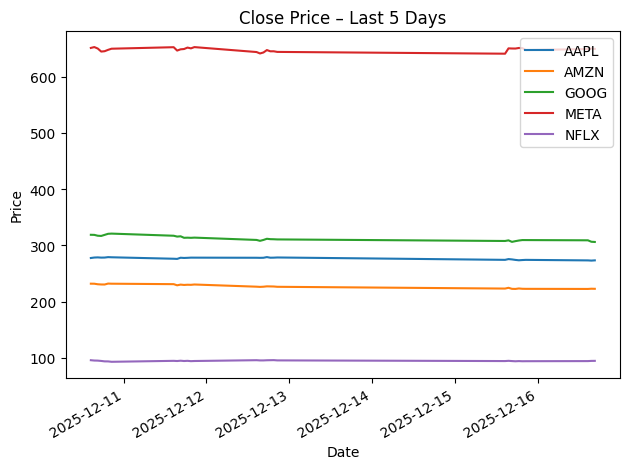

In [14]:
yfinance_plot = plot_data()

yfinance_plot

## Problem 3: Script


For the following problem, I copied the relevant code for downloading the data and generating the plots into a Python file called faang.py. Rather than defining these as reusable functions, the code was copied as a standalone script, since the intention is simply to run the file as-is.
>
Afterwards, I made sure I was able to excute the the script from the terminal command line by following these steps:
>
1. I opened a new terminal in the current active workspace.
2. I made sure I was located in my root repository by using the __ls -l__ command and paying attention to the directory __(/workspaces/Computer_Infrastructure (main))__
3. I checked if the python script was executable or not. It seems it only had read and write permissions as evidenced by the following: __-rw-rw-rw-__
4. I then used the command __chmod u+x faang.py__ to make sure that the file was executable
6. Finally, I made sure that the script contained a shebang line __(#! /usr/bin/env python)__ so the operating system knows which interpreter to use when executing the file.
5. I ran the script via the __./faang.py__ command to check if it was running fine.

## Problem 4: Automation


For this final problem, the goal is to create a GitHub Actions workflow that automates both the retrieval of the latest data from yfinance and the generation of the corresponding plots, storing the outputs in their appropriate folders.
>
After some researching on how to properly set up Github actions ([Github Actions Documentation](https://docs.github.com/en/actions/get-started/quickstart)) I went to ChatGPT ([You can read about ChatGPT's proposal here](https://chatgpt.com/share/6936f51a-b2ac-800b-ab0e-c4a5ddd1eaf5)) and asked him to get a YAML script that would run my faang.py script and after all changes were done, it would commit those changes to my main github repository. 
>
Below is the a copy of the YAML workflow generated from that proposal:

```yaml
# Reference: 
# https://chatgpt.com/share/6936f51a-b2ac-800b-ab0e-c4a5ddd1eaf5

# This line gives us the name of our github action 
name: Run script and get yfinance data

# This gives us the conditions on which this action will run
on:
  # This would be the Manual trigger from the Actions tab.
  workflow_dispatch:
  # This would be a scheduled trigger. It would run at the specified time I've set
  schedule:
    # 09:30 UTC every Saturday
    # Reference: 
    # https://crontab.guru/#30_9_*_*_6
    - cron: "30 9 * * 6"   

# This allows us see what permissions this github action has. In this case, it's allowed to commit changes and push changes made
# via the write function.
permissions:
  contents: write   

 # This is the actual core of what the github action does. The job here is run our script called faang.py
jobs:
  run-faang:
    # This is just which virtual machine github should use. In this case it's Linux's ubuntu, the latest version.
    runs-on: ubuntu-latest

    # These are the actual steps that the job is going to do. 
    steps:
      # The first step is get the latest version of our repository and clone it
      - name: Checkout repository
        uses: actions/checkout@v4
        with:
          fetch-depth: 0   # the fetch depth is what allows us get the full history, since we're to commit and push, 
                           # Git needs real history to base that on.

      # this sets up and installs the language we're going to use. In this case, it's python version 3.11                      
      - name: Set up Python
        uses: actions/setup-python@v5
        with:
          python-version: "3.11"  

      # This installs all the packages that we're going to use. In this case, it will get the depedencies from the 
      # requirements file in the root of our depository.       
      - name: Install dependencies (if any)
        run: |
          if [ -f requirements.txt ]; then
            pip install -r requirements.txt
          fi
      
      # The most important step. Actually running the script.    
      - name: Run faang.py
        run: |
          python faang.py

      # This makes the final adjustments to the final commit after running the script.
      # If Git reports any changed files, it will then commit them. In case there aren't any changes, it will release
      # a message saying: "No changes to commit."    
      - name: Commit and push changes (if any)
        run: |
          git config user.name "github-actions[bot]"
          git config user.email "github-actions[bot]@users.noreply.github.com"

          # Check if there is anything to commit
          if [ -n "$(git status --porcelain)" ]; then
            echo "Changes detected, committing..."
            git add -A
            git commit -m "Auto-update from faang.py"
            git push
          else
            echo "No changes to commit."
          fi

With this script done, I then made sure that this was in the *__workflows__* folder of my main repository. I tested it first with the github action running every day at 9.15 in the morning. Seeing that it ran with no issues, I then set it up to run every Saturday as per the assignment. 

# END